<a href="https://colab.research.google.com/github/itumor/colab/blob/master/trending_stock_prediction_F_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trending Stock Prediction**

In [1]:
from datetime import datetime
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
stock ='F'
startdate = '1900-01-01'
enddate = datetime.today().strftime('%Y-%m-%d')

In [3]:
df = web.DataReader(stock, data_source='yahoo',start = startdate, end = enddate)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1972-06-01,2.173495,2.149165,2.149165,2.153220,1089200.0,0.002859
1972-06-02,2.173495,2.141055,2.153220,2.149165,1173500.0,0.002853
1972-06-05,2.169440,2.141055,2.149165,2.149165,5208100.0,0.002853
1972-06-06,2.157275,2.116725,2.149165,2.124835,1421400.0,0.002821
1972-06-07,2.137000,2.112669,2.124835,2.112669,671800.0,0.002805
...,...,...,...,...,...,...
2020-09-24,6.760000,6.410000,6.600000,6.660000,59822900.0,6.660000
2020-09-25,6.710000,6.500000,6.610000,6.510000,53761800.0,6.510000
2020-09-28,6.770000,6.580000,6.590000,6.690000,47582600.0,6.690000


In [4]:
df.shape

(12190, 6)

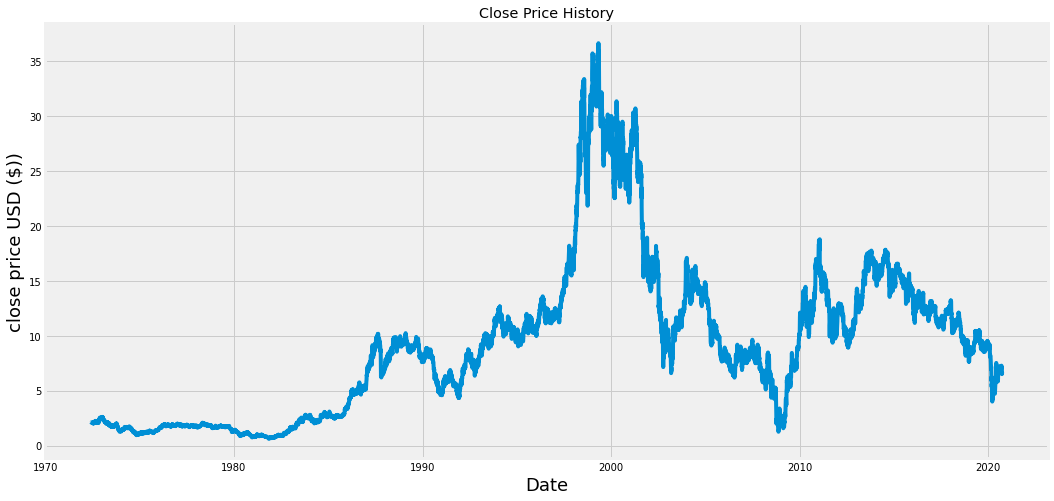

In [5]:

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price USD ($))', fontsize=18)
plt.show()


In [6]:
#data = df
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)


training_data_len



9752

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04192544],
       [0.04181281],
       [0.04181281],
       ...,
       [0.16793306],
       [0.16543333],
       [0.16696095]])

In [8]:
train_data = scaled_data[0:training_data_len , :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60 :
    print(x_train)
    print(y_train)
    print()

[array([0.04192544, 0.04181281, 0.04181281, 0.04113705, 0.04079917,
       0.04034866, 0.04001078, 0.04001078, 0.04046128, 0.04136231,
       0.04113705, 0.04136231, 0.04102443, 0.04124968, 0.04068654,
       0.04034866, 0.04023603, 0.04001078, 0.04046128, 0.04034866,
       0.0401234 , 0.0396729 , 0.03944764, 0.03910976, 0.03978552,
       0.03956027, 0.03888451, 0.03854663, 0.03809612, 0.03809612,
       0.03798349, 0.03798349, 0.03854663, 0.03888451, 0.03809612,
       0.03888451, 0.04046128, 0.04023603, 0.04001078, 0.03978552,
       0.04034866, 0.04034866, 0.04034866, 0.04113705, 0.0421507 ,
       0.04237595, 0.04248858, 0.04226332, 0.04136231, 0.04147493,
       0.04192544, 0.04226332, 0.04181281, 0.04023603, 0.04124968,
       0.04124968, 0.04147493, 0.04237595, 0.04474112, 0.0438401 ])]
[0.0430517112340797]



In [9]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(9692, 60, 1)

In [11]:
#model = Sequential()
#model.add(LSTM(100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
#model.add(LSTM(100, return_sequences= False))
#model.add(Dense(50))
#model.add(Dense(1))

In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics='accuracy' )


In [14]:
rmse= 100
while ( rmse >= 0.3):     
  model.fit(x_train, y_train, validation_data=(x_train, y_train) ,batch_size=100 , epochs=1)
  test_data = scaled_data[training_data_len - 60: , :]
  x_test = []
  y_test = dataset[training_data_len:, :]
  for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
  y_test.size
  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1 ))
  Predictions = model.predict(x_test)
  Predictions = scaler.inverse_transform(Predictions)
  rmse=np.sqrt(np.mean(((Predictions- y_test)**2)))
  rmse

97/97 [==============================] - 12s 126ms/step - loss: 1.0009e-04 - accuracy: 2.0636e-04 - val_loss: 7.7612e-05 - val_accuracy: 2.0636e-04


In [15]:
#acc_callback = AccuracyStopping(0.05)
#model.fit(x_train, y_train, validation_data=(x_train, y_train) ,batch_size=1 , epochs=10)
#model.fit(x_train, y_train, batch_size=1000, epochs=1000)

In [16]:
#model.fit(x_train, y_train, batch_size=1, epochs=100)
#model.fit(x_train, y_train, batch_size=1, epochs=100)

In [17]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

y_test.size
 



2438

In [18]:
x_test = np.array(x_test)


In [19]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1 ))


In [20]:
#Prediction 
Predictions = model.predict(x_test)
Predictions = scaler.inverse_transform(Predictions)

In [21]:
rmse=np.sqrt(np.mean(((Predictions- y_test)**2)))
rmse

0.29301145291704195

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


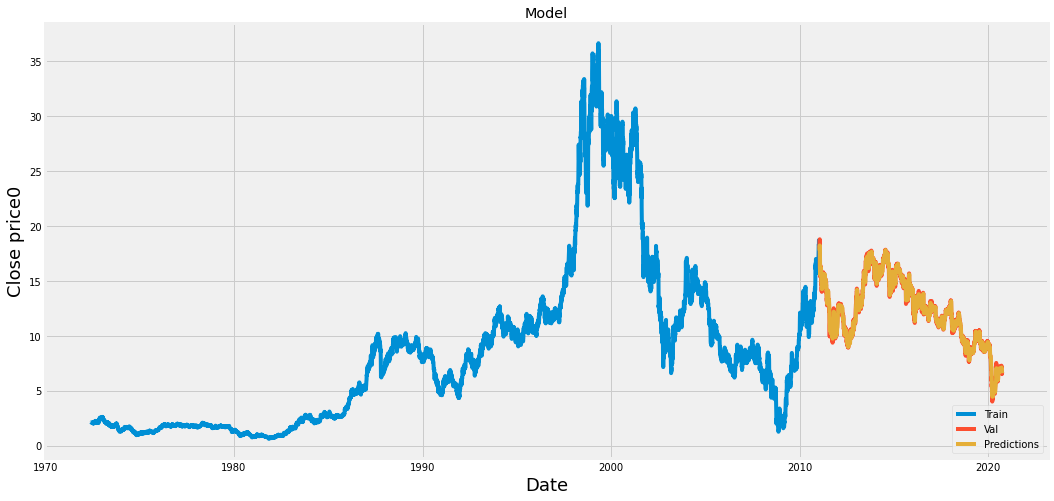

In [22]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = Predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18 )
plt.ylabel('Close price0' , fontsize=18 )
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val','Predictions'], loc='lower right')
plt.show()


In [23]:
valid

,Close,Predictions
Date,,
2011-01-25,17.889999,17.856297
2011-01-26,18.370001,17.803463
2011-01-27,18.790001,17.935808
2011-01-28,16.270000,18.229450
2011-01-31,15.950000,17.749578
...,...,...
2020-09-24,6.660000,6.878279
2020-09-25,6.510000,6.776588
2020-09-28,6.690000,6.670063


In [24]:

stock_qoute = web.DataReader(stock, data_source='yahoo',start = startdate, end = enddate)

new_df = stock_qoute.filter(['Close'])
last_60_days = new_df[-60:].values

last_60_days_scaled = scaler.transform(last_60_days)

x_test = [ ]
x_test.append(last_60_days_scaled)

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))

pred_price= model.predict(x_test)

pred_price = scaler.inverse_transform(pred_price)

print(pred_price)


[[6.580796]]


In [25]:
stock_qoute2 = web.DataReader(stock, data_source='yahoo',start = startdate, end = enddate)
print(stock_qoute2['Close'])

Date
1972-06-01    2.153220
1972-06-02    2.149165
1972-06-05    2.149165
1972-06-06    2.124835
1972-06-07    2.112669
                ...   
2020-09-24    6.660000
2020-09-25    6.510000
2020-09-28    6.690000
2020-09-29    6.600000
2020-09-30    6.655000
Name: Close, Length: 12190, dtype: float64
